82 70 9 2


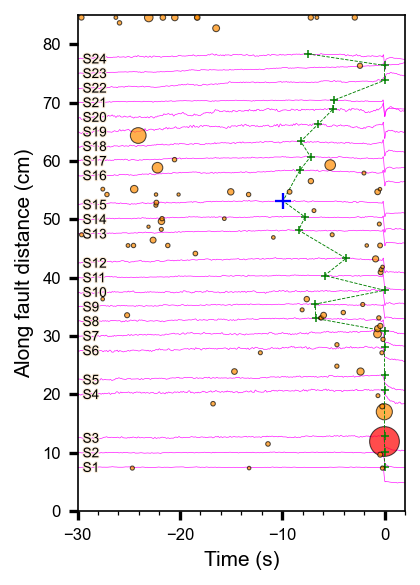

In [1]:
###粘滑事件与普通事件的对比
import numpy as np
import pandas as pd
import scipy.io as sio
import os
import cmaps
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mc
from matplotlib.pyplot import MultipleLocator 
from matplotlib import patheffects
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['xtick.major.width'] = 1.6
plt.rcParams['ytick.major.width'] = 1.6
plt.rcParams['xtick.major.size']  = 4.5
plt.rcParams['xtick.minor.size']  = 2
plt.rcParams['ytick.major.size']  = 4.5
plt.rcParams['ytick.minor.size']  = 2


strain = sio.loadmat("strain6.mat")["d_s"]
time_s = sio.loadmat("time6.mat")["ts_s"][0]-119.1
strains = strain


data= sio.loadmat("AE_6.mat")["data"]
time=data[0,:]

##
strain_6 = pd.read_csv("new_strain_6_new.csv", header=None).values
ts = strain_6[:,0]-strain_6[:,2]

##  事件小于-6以内的
inx = np.where(time>=-30)[0]
time = time[inx]
data = data[:,inx]

## 按地震分级
mags =np.round(data[2,:],1)
inxs = np.where((mags>=0.9) & (mags<=1.9))[0]
inxss = np.where((mags>=2.0) & (mags<=2.9))[0]
inxsss = np.where((mags>=3.0) & (mags<=3.9))[0]
print(len(mags),len(inxs), len(inxss), len(inxsss))
area = (data[2,:]*1.0)**3.4

#1<M<1.9
times = time[inxs]
dists = data[1, inxs]
areas = area[inxs]

#2.0<M<2.9
timess = time[inxss]
distss = data[1, inxss]
areass = area[inxss]

#3.0<M<3.9
timesss = time[inxsss]
distsss = data[1, inxsss]
areasss = area[inxsss]-20


## 主震
time_m = time[-1]
dist_m = data[1,-1]
area_m = area[-1]+40

pe =[patheffects.withStroke(linewidth=1,foreground="antiquewhite")]

fig, ax = plt.subplots(1, 1, figsize=(2.9,4.0), dpi=150)
ax.plot(time_s, strains, color="magenta", lw=0.30)

ax.scatter(times, dists, s=areas, marker="o", alpha=0.7, c="darkorange",edgecolors="k", lw=0.5, zorder=5)

ax.scatter(timess, distss, s=areass, marker="o", alpha=0.7, c="darkorange",edgecolors="k", lw=0.5, zorder=2)

ax.scatter(timesss, distsss, s=areasss, marker="o", alpha=0.7, c="darkorange",edgecolors="k", lw=0.5, zorder=2)

ax.scatter(time_m, dist_m, s=area_m, marker="o", alpha=0.7, c="r",edgecolors="k", lw=0.5, zorder=2)

x=[7.5, 10, 12.5, 20, 22.5, 27.5, 30, 32.5, 35, 37.5, 40, 42.5, 47.5, 50, 52.5, 57.5, 60, 62.5, 65, 67.5, 70, 72.5, 75, 77.5]
for i in range (len(x)):
    ax.annotate('S'+str(i+1), (-29.5, x[i]-0.80), size=6.5, path_effects=pe, zorder=4)

## lc
ax.plot(ts, strain_6[:,1],c="green", lw=0.43, ls="--", marker="+", markersize=4.3, markeredgewidth=0.72, markeredgecolor="green", alpha=1.0)
ax.plot(ts[9], strain_6[9,1],c="b", lw=0.5, ls="--", marker="+", markersize=7.7, markeredgewidth=1.1, markeredgecolor="b", alpha=1.0)


ax.set_xlim(-30,2) 
ax.set_ylim(0,85)
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel("Time (s)", fontsize=10)
ax.set_ylabel("Along fault distance (cm)", fontsize=10)
# ax.set_xscale('symlog',linthresh=0.00999, subs=[2, 3, 4, 5, 6, 7, 8, 9])
ax.minorticks_on()
ax.yaxis.set_tick_params(which='minor', bottom=False)
plt.tight_layout()
# plt.savefig(r"C:\Users\Administrator.DESKTOP-Q5G5OQ4\Desktop\event6.pdf")